In [1]:
import gseapy as gp
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
gp.get_library_name(organism="mouse")

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisG

In [9]:
ac_gene_df = pd.read_csv("/mnt/d/dailywork/Mouse_brain/AC_EnrichMotifGene.txt", header=None, sep='/n')
ac_gene_list = ac_gene_df.squeeze().str.strip().to_list()
ac_gene_list[:10]

/tmp/ipykernel_781/2218743175.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ac_gene_df = pd.read_csv("/mnt/d/dailywork/Mouse_brain/AC_EnrichMotifGene.txt", header=None, sep='/n')


['Tcfap2a',
 'Tcfap2b',
 'Tcfap2c',
 'Tcfap2e',
 'Tcfap2d',
 'Arid3b',
 'Arid3a',
 'Arid5b',
 'Arid5a',
 'Arid3c']

In [10]:
enr = gp.enrichr(gene_list=ac_gene_list,
                 gene_sets="KEGG_2019_Mouse",
                 organism="mouse",
                 outdir=None)

In [12]:
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Mouse,Transcriptional misregulation in cancer,59/183,1.849510e-37,2.737275e-35,0,0,12.300693,1040.401548,ATF1;SIX1;HOXA11;HOXA10;ELK4;LYL1;HOXA9;HHEX;S...
1,KEGG_2019_Mouse,Maturity onset diabetes of the young,19/27,3.411286e-21,2.524352e-19,0,0,58.596562,2761.491734,ONECUT1;HNF4G;PDX1;PAX4;PAX6;HNF1B;BHLHA15;HNF...
2,KEGG_2019_Mouse,Signaling pathways regulating pluripotency of ...,35/137,5.308987e-19,2.619100e-17,0,0,8.601397,361.944352,DLX5;ONECUT1;SOX2;ZIC3;MYC;HESX1;OTX1;SMAD2;SM...
3,KEGG_2019_Mouse,Hepatitis B,35/163,1.977247e-16,7.315813e-15,0,0,6.844909,247.509539,ATF2;ATF6B;ELK1;RELA;CREB3L3;MYC;CREB3L2;E2F1;...
4,KEGG_2019_Mouse,Th17 cell differentiation,27/102,2.203500e-15,6.522361e-14,0,0,8.942961,301.813571,RORC;RORA;AHR;GATA3;RELA;RXRB;RXRA;TBX21;STAT6...


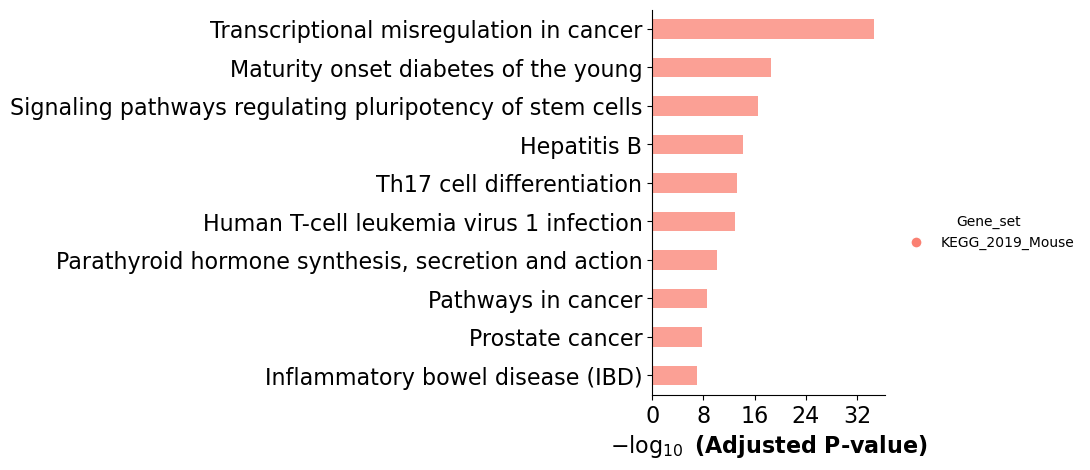

In [15]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,5)
              #color=['darkred', 'darkblue'] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

In [2]:
data = pd.read_csv("/mnt/d/dailywork/Mouse_brain/CelltypeMotif.csv")

In [17]:
data.rename(columns={"Unnamed: 0": "Name"}, inplace=True)

In [20]:
data.shape

(884, 19)

In [19]:
print(len(set(data.Name.tolist())))
print(len(set(data.Name.str.split("_").str[0])))

884
797
